# Using NumPy and Pandas

In [1]:
import numpy as np
import pandas as pd

## Basic data structures in pandas
Pandas provides two types of classes for handling data:

`Series`: a one-dimensional labeled array holding data of any type
such as integers, strings, Python objects etc.

`DataFrame`: a two-dimensional data structure that holds data like a two-dimension array or a table with rows and columns.

In [2]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
print(s)

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


## DataFrame
Creating a dataframe by passing a Numpy array with datetime index using `date_range()` and labeled columns

In [3]:
dates = pd.date_range("20130101", periods=6)
print(dates)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [4]:
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))
print(df)

                   A         B         C         D
2013-01-01 -0.645782 -0.277227 -0.535447 -0.470901
2013-01-02  0.440471  0.832719 -0.129296 -1.104029
2013-01-03  0.764812 -1.694410 -1.055522 -0.180616
2013-01-04 -0.609796 -0.610343  0.767234  1.071167
2013-01-05 -0.019679  0.626147 -1.606761  0.512019
2013-01-06  0.097372  1.319592  0.741869  1.312146


Now we can create a dataframe by passing a dictionary of objects where the keys are the column labels and values are the column values

In [5]:
df2 = pd.DataFrame({
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo",
})
print(df2)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo


The columns of the resulting DataFrame have different dtypes

In [6]:
print(df2.dtypes)

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object


## Viewing data
Use `DataFrame.head()` and `DataFrame.tail()` to view the top and bottom rows of the frame respectively.

In [7]:
print(df.head())

                   A         B         C         D
2013-01-01 -0.645782 -0.277227 -0.535447 -0.470901
2013-01-02  0.440471  0.832719 -0.129296 -1.104029
2013-01-03  0.764812 -1.694410 -1.055522 -0.180616
2013-01-04 -0.609796 -0.610343  0.767234  1.071167
2013-01-05 -0.019679  0.626147 -1.606761  0.512019


In [8]:
print(df.tail())

                   A         B         C         D
2013-01-02  0.440471  0.832719 -0.129296 -1.104029
2013-01-03  0.764812 -1.694410 -1.055522 -0.180616
2013-01-04 -0.609796 -0.610343  0.767234  1.071167
2013-01-05 -0.019679  0.626147 -1.606761  0.512019
2013-01-06  0.097372  1.319592  0.741869  1.312146


Display the `DataFrame.index` or `DataFrame.columns`

In [9]:
print(df.index)

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')


In [10]:
print(df.columns)

Index(['A', 'B', 'C', 'D'], dtype='object')


Return a Numpy representation of the underlying data with `DataFrame.to_numpy()` without the index or column labels

In [11]:
print(df.to_numpy())

[[-0.6457817  -0.27722691 -0.53544728 -0.47090118]
 [ 0.44047126  0.83271852 -0.12929556 -1.10402925]
 [ 0.7648122  -1.69441029 -1.05552216 -0.18061583]
 [-0.60979564 -0.61034261  0.76723427  1.07116726]
 [-0.01967949  0.62614725 -1.60676146  0.51201916]
 [ 0.09737245  1.31959166  0.74186941  1.31214608]]


`describe()` shows a quick statistic summary of your data

In [12]:
print(df.describe())

              A         B         C         D
count  6.000000  6.000000  6.000000  6.000000
mean   0.004567  0.032746 -0.302987  0.189964
std    0.561708  1.108221  0.957856  0.936805
min   -0.645782 -1.694410 -1.606761 -1.104029
25%   -0.462267 -0.527064 -0.925503 -0.398330
50%    0.038846  0.174460 -0.332371  0.165702
75%    0.354697  0.781076  0.524078  0.931380
max    0.764812  1.319592  0.767234  1.312146


Transposing your data

In [13]:
print(df.T)

   2013-01-01  2013-01-02  2013-01-03  2013-01-04  2013-01-05  2013-01-06
A   -0.645782    0.440471    0.764812   -0.609796   -0.019679    0.097372
B   -0.277227    0.832719   -1.694410   -0.610343    0.626147    1.319592
C   -0.535447   -0.129296   -1.055522    0.767234   -1.606761    0.741869
D   -0.470901   -1.104029   -0.180616    1.071167    0.512019    1.312146


`DataFrame.sort_index()` sorts by an axis

In [14]:
print(df.sort_index(axis=1, ascending=False))

                   D         C         B         A
2013-01-01 -0.470901 -0.535447 -0.277227 -0.645782
2013-01-02 -1.104029 -0.129296  0.832719  0.440471
2013-01-03 -0.180616 -1.055522 -1.694410  0.764812
2013-01-04  1.071167  0.767234 -0.610343 -0.609796
2013-01-05  0.512019 -1.606761  0.626147 -0.019679
2013-01-06  1.312146  0.741869  1.319592  0.097372


`DataFrame.sort_values()` sorts by values

In [15]:
print(df.sort_values(by="B"))

                   A         B         C         D
2013-01-03  0.764812 -1.694410 -1.055522 -0.180616
2013-01-04 -0.609796 -0.610343  0.767234  1.071167
2013-01-01 -0.645782 -0.277227 -0.535447 -0.470901
2013-01-05 -0.019679  0.626147 -1.606761  0.512019
2013-01-02  0.440471  0.832719 -0.129296 -1.104029
2013-01-06  0.097372  1.319592  0.741869  1.312146


## Selection
### Getitem (`[]`)
For a `DataFrame`, passing a single label selects a columns and yields a `Series` equivalent to `df.A`

In [16]:
print(df["A"])

2013-01-01   -0.645782
2013-01-02    0.440471
2013-01-03    0.764812
2013-01-04   -0.609796
2013-01-05   -0.019679
2013-01-06    0.097372
Freq: D, Name: A, dtype: float64


For a `DataFrame`, passing a slice `:` selects matching rows

In [17]:
print(df[0:3])

                   A         B         C         D
2013-01-01 -0.645782 -0.277227 -0.535447 -0.470901
2013-01-02  0.440471  0.832719 -0.129296 -1.104029
2013-01-03  0.764812 -1.694410 -1.055522 -0.180616


### Selection by label
Selecting a row matching a label:

In [18]:
print(df.loc[dates[0]])

A   -0.645782
B   -0.277227
C   -0.535447
D   -0.470901
Name: 2013-01-01 00:00:00, dtype: float64


Selecting all rows (`:`) with a select column labels

In [19]:
print(df.loc[:, ["A", "B"]])

                   A         B
2013-01-01 -0.645782 -0.277227
2013-01-02  0.440471  0.832719
2013-01-03  0.764812 -1.694410
2013-01-04 -0.609796 -0.610343
2013-01-05 -0.019679  0.626147
2013-01-06  0.097372  1.319592


For label slicing, both endpoints are included

In [20]:
print(df.loc["20130102":"20130104", ["A", "B"]])

                   A         B
2013-01-02  0.440471  0.832719
2013-01-03  0.764812 -1.694410
2013-01-04 -0.609796 -0.610343


Selecting a single row and column label returns a scalar

In [21]:
print(df.loc[dates[0], "A"])

-0.6457816962310934


For getting fast access to a scalar (equivalent to the prior method)

In [22]:
print(df.at[dates[0], "A"])

-0.6457816962310934


### Selection by position
Select via the position of the passed integers

In [23]:
print(df.iloc[3])

A   -0.609796
B   -0.610343
C    0.767234
D    1.071167
Name: 2013-01-04 00:00:00, dtype: float64


Integer slices act similar to Numpy/Python

In [24]:
# the first seems to be the row, second is column
print(df.iloc[3:5, 0:2])

                   A         B
2013-01-04 -0.609796 -0.610343
2013-01-05 -0.019679  0.626147


Lists of integer position locations

In [25]:
print(df.iloc[[1, 2, 4], [0,2]])

                   A         C
2013-01-02  0.440471 -0.129296
2013-01-03  0.764812 -1.055522
2013-01-05 -0.019679 -1.606761


For slicing rows explicitly

In [26]:
print(df.iloc[1:3, :])

                   A         B         C         D
2013-01-02  0.440471  0.832719 -0.129296 -1.104029
2013-01-03  0.764812 -1.694410 -1.055522 -0.180616


In [27]:
print(df.iloc[:, 1:3])

                   B         C
2013-01-01 -0.277227 -0.535447
2013-01-02  0.832719 -0.129296
2013-01-03 -1.694410 -1.055522
2013-01-04 -0.610343  0.767234
2013-01-05  0.626147 -1.606761
2013-01-06  1.319592  0.741869


For getting values explicitly

In [28]:
print(df.iloc[1, 1])

0.8327185228586381


For getting fast access to a scalar (equivalent to the prior method)

In [29]:
print(df.iat[1, 1])

0.8327185228586381


## Boolean indexing
Select rows where `df.A` is greater than `0`

In [30]:
print(df[df["A"] > 0])

                   A         B         C         D
2013-01-02  0.440471  0.832719 -0.129296 -1.104029
2013-01-03  0.764812 -1.694410 -1.055522 -0.180616
2013-01-06  0.097372  1.319592  0.741869  1.312146


Selecting values from a `DataFrame` where a boolean condition is met

In [31]:
print(df[df > 0])

                   A         B         C         D
2013-01-01       NaN       NaN       NaN       NaN
2013-01-02  0.440471  0.832719       NaN       NaN
2013-01-03  0.764812       NaN       NaN       NaN
2013-01-04       NaN       NaN  0.767234  1.071167
2013-01-05       NaN  0.626147       NaN  0.512019
2013-01-06  0.097372  1.319592  0.741869  1.312146


Using `isin()` method for filtering

In [32]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
print(df2)

                   A         B         C         D      E
2013-01-01 -0.645782 -0.277227 -0.535447 -0.470901    one
2013-01-02  0.440471  0.832719 -0.129296 -1.104029    one
2013-01-03  0.764812 -1.694410 -1.055522 -0.180616    two
2013-01-04 -0.609796 -0.610343  0.767234  1.071167  three
2013-01-05 -0.019679  0.626147 -1.606761  0.512019   four
2013-01-06  0.097372  1.319592  0.741869  1.312146  three


In [33]:
print(df2[df2["E"].isin(["two", "four"])])

                   A         B         C         D     E
2013-01-03  0.764812 -1.694410 -1.055522 -0.180616   two
2013-01-05 -0.019679  0.626147 -1.606761  0.512019  four


## Setting

Setting a new column automatically aligns the data by the indexes:

In [34]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
print(s1)
print("*" * 90)
df["F"] = s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64
******************************************************************************************


Setting values by labels:

In [35]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [36]:
df.iat[0, 1] = 0

Setting by assigning with a Numpy array:

In [37]:
df.loc[:, "D"] = np.array([5] * len(df))
print(df)

                   A         B         C    D    F
2013-01-01  0.000000  0.000000 -0.535447  5.0  NaN
2013-01-02  0.440471  0.832719 -0.129296  5.0  1.0
2013-01-03  0.764812 -1.694410 -1.055522  5.0  2.0
2013-01-04 -0.609796 -0.610343  0.767234  5.0  3.0
2013-01-05 -0.019679  0.626147 -1.606761  5.0  4.0
2013-01-06  0.097372  1.319592  0.741869  5.0  5.0


A `where` operation with setting:

In [38]:
df2 = df.copy()
df2[df2 > 0] = -df2
print(df2)

                   A         B         C    D    F
2013-01-01  0.000000  0.000000 -0.535447 -5.0  NaN
2013-01-02 -0.440471 -0.832719 -0.129296 -5.0 -1.0
2013-01-03 -0.764812 -1.694410 -1.055522 -5.0 -2.0
2013-01-04 -0.609796 -0.610343 -0.767234 -5.0 -3.0
2013-01-05 -0.019679 -0.626147 -1.606761 -5.0 -4.0
2013-01-06 -0.097372 -1.319592 -0.741869 -5.0 -5.0


## Missing data
For NumPy data types `np.nan` represents missing data. It is by default not included in computations.
Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data:

In [39]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
print(df1)

                   A         B         C    D    F    E
2013-01-01  0.000000  0.000000 -0.535447  5.0  NaN  1.0
2013-01-02  0.440471  0.832719 -0.129296  5.0  1.0  1.0
2013-01-03  0.764812 -1.694410 -1.055522  5.0  2.0  NaN
2013-01-04 -0.609796 -0.610343  0.767234  5.0  3.0  NaN


`DataFrame.dropna()` drops any rows that have missing data:

In [40]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,0.440471,0.832719,-0.129296,5.0,1.0,1.0


`DataFrame.fillna()` fills missing data:

In [41]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.535447,5.0,5.0,1.0
2013-01-02,0.440471,0.832719,-0.129296,5.0,1.0,1.0
2013-01-03,0.764812,-1.694410,-1.055522,5.0,2.0,5.0
2013-01-04,-0.609796,-0.610343,0.767234,5.0,3.0,5.0


`isna()` gets the boolean mask where values are `nan`:

In [42]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


## Operations

### Stats
Operations in general exclude missing data.
Calculate the mean value for each column:

In [43]:
print(df.mean())

A    0.112197
B    0.078951
C   -0.302987
D    5.000000
F    3.000000
dtype: float64


Calculate the mean value for each row:

In [44]:
print(df.mean(axis=1))

2013-01-01    1.116138
2013-01-02    1.428779
2013-01-03    1.002976
2013-01-04    1.509419
2013-01-05    1.599941
2013-01-06    2.431767
Freq: D, dtype: float64


Operating with another `Series` or `DataFrame` with a different index or column will align the result with the union of the index or column labels. In addition, pandas automatically broadcasts along the specified dimnesion and will fill unaligned labels with `np.nan`

In [45]:
s = pd.Series([1, 3, 4, np.nan, 6, 8], index=dates).shift(2)
print(s)

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    4.0
2013-01-06    NaN
Freq: D, dtype: float64


In [46]:
print(df.sub(s, axis="index"))

                   A         B         C    D    F
2013-01-01       NaN       NaN       NaN  NaN  NaN
2013-01-02       NaN       NaN       NaN  NaN  NaN
2013-01-03 -0.235188 -2.694410 -2.055522  4.0  1.0
2013-01-04 -3.609796 -3.610343 -2.232766  2.0  0.0
2013-01-05 -4.019679 -3.373853 -5.606761  1.0  0.0
2013-01-06       NaN       NaN       NaN  NaN  NaN


### User defined functions
`DataFrame.agg()` and `DataFrame.transform()` aplies a user defined function that reduces or broadcasts its result respectively.

In [47]:
print(df.agg(lambda x: np.mean(x) * 56))
print("*" * 90)
print(df.transform(lambda x: x * 101.2))

A      6.283021
B      4.421242
C    -16.967279
D    280.000000
F    168.000000
dtype: float64
******************************************************************************************
                    A           B           C      D      F
2013-01-01   0.000000    0.000000  -54.187264  506.0    NaN
2013-01-02  44.575691   84.271115  -13.084710  506.0  101.2
2013-01-03  77.398994 -171.474321 -106.818843  506.0  202.4
2013-01-04 -61.711318  -61.766672   77.644108  506.0  303.6
2013-01-05  -1.991564   63.366102 -162.604260  506.0  404.8
2013-01-06   9.854091  133.542676   75.077184  506.0  506.0


### Value counts

In [48]:
s = pd.Series(np.random.randint(0, 7, size=10))
print(s)
print("*" * 90)
print(s.value_counts())

0    5
1    2
2    2
3    6
4    4
5    2
6    3
7    5
8    0
9    6
dtype: int64
******************************************************************************************
2    3
5    2
6    2
4    1
3    1
0    1
Name: count, dtype: int64


### String Methods
`Series` is equipped with a set of string processing methods in the `str` attribute that make it easy to operate on each element of the array, as in the code snippet below

In [49]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
print(s.str.lower())

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object


## Merge

### Concat
pandas provides various facilities for easily combining together `Series` and `DataFrame` objects with various kinds of set logic for the indexes and relational algebra functionality in the case of join / merrge-type operations.
Concatenating pandas objects together row-wise with `concat()`:

In [50]:
df = pd.DataFrame(np.random.randn(10, 4))
print(df)
print("*" * 90)
# break it into pieces
pieces = [df[:3], df[3:7], df[7:]]

print(pd.concat(pieces))

          0         1         2         3
0  1.593868  0.381251 -0.093210  0.180614
1 -0.614419 -0.082888 -0.681405 -0.898055
2 -0.114654  0.204168 -1.023798  0.679706
3 -0.271611  1.663515 -0.750891 -1.129986
4 -0.886477 -1.360302  1.005482  2.054285
5 -0.034716 -0.525838 -0.357901  1.204735
6  0.031427  0.458076  0.646708 -1.078817
7 -0.383769 -0.941031 -0.055806  1.587795
8 -1.939478 -1.435845 -1.064613 -0.212588
9  0.414776 -1.268129 -0.832670  1.429980
******************************************************************************************
          0         1         2         3
0  1.593868  0.381251 -0.093210  0.180614
1 -0.614419 -0.082888 -0.681405 -0.898055
2 -0.114654  0.204168 -1.023798  0.679706
3 -0.271611  1.663515 -0.750891 -1.129986
4 -0.886477 -1.360302  1.005482  2.054285
5 -0.034716 -0.525838 -0.357901  1.204735
6  0.031427  0.458076  0.646708 -1.078817
7 -0.383769 -0.941031 -0.055806  1.587795
8 -1.939478 -1.435845 -1.064613 -0.212588
9  0.414776 -1.268129 -0.83

### Join
`merge()` enables SQL style join types along specific columns

In [51]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
print(left)
print("*" * 90)
print(right)
print("*" * 90)
print(pd.merge(left, right, on="key"))

   key  lval
0  foo     1
1  foo     2
******************************************************************************************
   key  rval
0  foo     4
1  foo     5
******************************************************************************************
   key  lval  rval
0  foo     1     4
1  foo     1     5
2  foo     2     4
3  foo     2     5


`merge()` on unique keys:

In [52]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
print(left)
print("*" * 90)
print(right)
print("*" * 90)
print(pd.merge(left, right, on="key"))

   key  lval
0  foo     1
1  bar     2
******************************************************************************************
   key  rval
0  foo     4
1  bar     5
******************************************************************************************
   key  lval  rval
0  foo     1     4
1  bar     2     5


## Grouping
By "group by" we are referring to a process involving one or more of the following steps:
- *Splitting* the data into groups based on some criteria
- *Applying* a function to each group independently
- *Combining* the results into a data structure

In [53]:
df = pd.DataFrame(
    {
        "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
        "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
        "C": np.random.randn(8),
        "D": np.random.randn(8),
    }
)
print(df)

     A      B         C         D
0  foo    one -1.363536  0.527506
1  bar    one -1.597635 -0.454186
2  foo    two -1.024727 -1.138127
3  bar  three  1.763881 -0.110308
4  foo    two  1.600063  1.296281
5  bar    two -0.005620 -0.854697
6  foo    one -2.145945 -0.214980
7  foo  three  0.696883 -1.342869


Grouping by a column label, selecting column labels, and then applying the `DataFrmaeGroupBy.sum()` function to the resulting groups:

In [54]:
print(df.groupby("A")[["C", "D"]].sum())

            C         D
A                      
bar  0.160626 -1.419191
foo -2.237262 -0.872189


Grouping by multiple columns label forms `MultiIndex`

In [55]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -1.597635 -0.454186
    three  1.763881 -0.110308
    two   -0.005620 -0.854697
foo one   -3.509481  0.312526
    three  0.696883 -1.342869
    two    0.575335  0.158154

## Reshaping

### Stack


In [56]:
arrays = [
   ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
   ["one", "two", "one", "two", "one", "two", "one", "two"],
]


index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])

df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])

df2 = df[:4]

print(df2)

                     A         B
first second                    
bar   one    -0.144924  0.323093
      two     2.390572 -2.135039
baz   one     0.852902  0.419058
      two     0.490501 -0.822524


The `stack()` method "compresses" a level in the DataFrame's columns:

In [57]:
stacked = df2.stack(future_stack=True)
print(stacked)

first  second   
bar    one     A   -0.144924
               B    0.323093
       two     A    2.390572
               B   -2.135039
baz    one     A    0.852902
               B    0.419058
       two     A    0.490501
               B   -0.822524
dtype: float64


With a "stacked" DataFrame or Series having a `MultiIndex` as the `index`, the inverse operation of `stack()` is `unstack()`, which by default unstacks the last level:

In [58]:
c = stacked.unstack()
print(c)
print("*" * 90)
d = stacked.unstack(1)
print(d)
print("*" * 90)
e = stacked.unstack(0)
print(e)

                     A         B
first second                    
bar   one    -0.144924  0.323093
      two     2.390572 -2.135039
baz   one     0.852902  0.419058
      two     0.490501 -0.822524
******************************************************************************************
second        one       two
first                      
bar   A -0.144924  2.390572
      B  0.323093 -2.135039
baz   A  0.852902  0.490501
      B  0.419058 -0.822524
******************************************************************************************
first          bar       baz
second                      
one    A -0.144924  0.852902
       B  0.323093  0.419058
two    A  2.390572  0.490501
       B -2.135039 -0.822524


### Pivot tables

In [59]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)

print(df)

        A  B    C         D         E
0     one  A  foo -2.201889  1.498817
1     one  B  foo -1.631811 -0.117236
2     two  C  foo -0.799306 -0.593733
3   three  A  bar  0.098810 -0.982984
4     one  B  bar  0.158380  1.262898
5     one  C  bar  1.187423 -0.320698
6     two  A  foo -0.656148 -0.860997
7   three  B  foo -1.100429  2.572269
8     one  C  foo -0.269638 -0.480058
9     one  A  bar  1.295731 -0.561450
10    two  B  bar -0.677172 -0.111026
11  three  C  bar -1.514241  1.098159


`pivot_table()` pivots a `DataFrame` specifying the `values`, `index` and `columns`

In [60]:
print(pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"]))

C             bar       foo
A     B                    
one   A  1.295731 -2.201889
      B  0.158380 -1.631811
      C  1.187423 -0.269638
three A  0.098810       NaN
      B       NaN -1.100429
      C -1.514241       NaN
two   A       NaN -0.656148
      B -0.677172       NaN
      C       NaN -0.799306


## Time series
pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g. converting secondly data into 5-minutely data). This extremely common in, but not limited to, financial applications.

In [61]:
rng = pd.date_range("1/1/2012", periods=100, freq="s")

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

print(ts.resample("5Min").sum())

2012-01-01    27899
Freq: 5min, dtype: int64


`Series.tz_localize()` localizes a time series to a time zone:

In [62]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")

ts = pd.Series(np.random.randn(len(rng)), rng)

print(ts)
print("*" * 90)
ts_utc = ts.tz_localize("UTC")

print(ts_utc)

2012-03-06    1.140370
2012-03-07   -1.827638
2012-03-08   -0.091569
2012-03-09   -0.744289
2012-03-10    0.915171
Freq: D, dtype: float64
******************************************************************************************
2012-03-06 00:00:00+00:00    1.140370
2012-03-07 00:00:00+00:00   -1.827638
2012-03-08 00:00:00+00:00   -0.091569
2012-03-09 00:00:00+00:00   -0.744289
2012-03-10 00:00:00+00:00    0.915171
Freq: D, dtype: float64


`Series.tz_convert()` converts a timezones aware time series to another time zone:

In [63]:
print(ts_utc.tz_convert("US/Eastern"))

2012-03-05 19:00:00-05:00    1.140370
2012-03-06 19:00:00-05:00   -1.827638
2012-03-07 19:00:00-05:00   -0.091569
2012-03-08 19:00:00-05:00   -0.744289
2012-03-09 19:00:00-05:00    0.915171
Freq: D, dtype: float64


Adding a non-fixed duration(`BusinessDay`) to a time series:

In [64]:
print(rng)

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')


In [65]:
print(rng + pd.offsets.BusinessDay(5))

DatetimeIndex(['2012-03-13', '2012-03-14', '2012-03-15', '2012-03-16',
               '2012-03-16'],
              dtype='datetime64[ns]', freq=None)


## Categoricals
pandas can include categorical data in a `DataFrame`.

In [66]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

Converting the raw grades to a categorical data type:

In [67]:
df["grade"] = df["raw_grade"].astype("category")
print(df["grade"])

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']


Renaming the categories to more meaningful names:

In [68]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)

Reorder the categories and simultaneously add the missing categories (methods under `Series.cat()` return a new `Series` by default):

In [69]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)

print(df["grade"])

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']


Sorting is per order in the categories, not lexical order

In [70]:
print(df.sort_values(by="grade"))

   id raw_grade      grade
5   6         e   very bad
1   2         b       good
2   3         b       good
0   1         a  very good
3   4         a  very good
4   5         a  very good


Grouping by a categorical column with `observed=False` also shows empty categories

In [71]:
print(df.groupby("grade", observed=False).size())

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64


## Plotting
We use the standard convention for referencing the matplotlib API:

In [72]:
import matplotlib.pyplot as plt
plt.close("all")

The `plt.close` method is used to close a figure window:

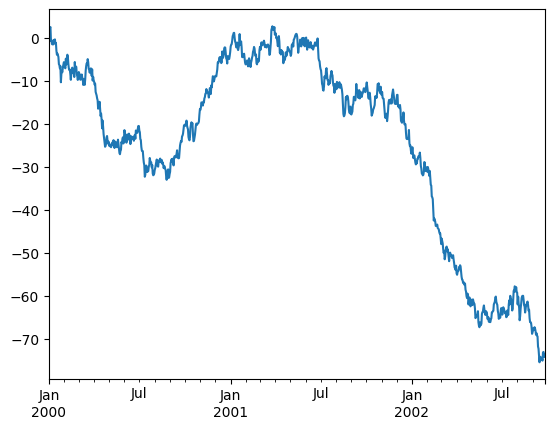

In [73]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

ts = ts.cumsum()

ts.plot();

`plot()` plots all columns:

<Figure size 640x480 with 0 Axes>

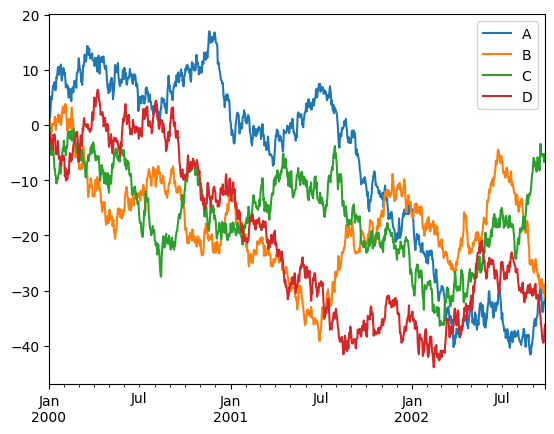

In [74]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)
df = df.cumsum()

plt.figure();

df.plot();

plt.legend(loc='best');

## Importing and exporting data

### CSV
Writing to a CSV file using `DataFrame.to_csv()`

In [75]:
df = pd.DataFrame(np.random.randint(0, 5, (10, 5)))
df.to_csv("foo.csv")

Reading from a csv file using `read_csv()`

In [76]:
pd.read_csv("foo.csv")

,Unnamed: 0,0,1,2,3,4
0,0,0,3,0,2,0
1,1,1,3,4,0,2
2,2,4,4,0,0,4
3,3,2,2,3,2,4
4,4,3,3,0,0,0
5,5,2,3,1,3,3
6,6,4,1,1,3,4
7,7,4,3,2,4,0
8,8,1,4,3,1,3
9,9,2,0,0,4,3


### Parquet
Writing to a Parquet file

In [ ]:
df.to_parquet("foo.parquet")

Reading from a Parquet file Store using `read_parquet()`

In [ ]:
pd.read_parquet("foo.parquet")

### Excel
Reading and writing to Excel
Writing to an excel file using `DataFrame.to_excel()`

In [79]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using `read_excel()`:

Reading from an excel file using `read_excel()`:

In [80]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,0,1,2,3,4
0,0,0,3,0,2,0
1,1,1,3,4,0,2
2,2,4,4,0,0,4
3,3,2,2,3,2,4
4,4,3,3,0,0,0
5,5,2,3,1,3,3
6,6,4,1,1,3,4
7,7,4,3,2,4,0
8,8,1,4,3,1,3
9,9,2,0,0,4,3
